In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc

# 기본 애니메이션

In [3]:
fig, ax = plt.subplots()

# 1. 그림 범위 설정
ax.set_xlim([0, 10])

# 2. 점 초기화
scat = ax.scatter(1, 0)
x = np.linspace(0, 10)

# 3) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(x[i], 0)로 이동
def animate(i):
    scat.set_offsets((x[i], 0))
    return (scat,)

# 4) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=len(x),        # 총 프레임 수 = x 배열 길이만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

## 1. 등속운동 (Constant Velocity Motion)

- 정의: 가속도가 0이고, 속도가 일정한 운동
- 방정식: 위치 $x(t) = x_0 + v \cdot t$

In [28]:
fig, ax = plt.subplots()

# 1. 그림 범위 설정
ax.set_xlim([0, 5])

# 2. 점 초기화
dt = 0.1        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
vx_init = 1
pos_init = ax.scatter(x_init, 0)

x = np.zeros(steps)
y = np.zeros(steps)
for t in range(steps):
  if t == 0:
    x[t] = x_init
  else:
    x[t] = x[t-1] + vx_init * dt

# 3) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(x[t], 0)로 이동
def animate(t):
    pos_init.set_offsets((x[t], 0))
    return (pos_init,)

# 4) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=steps,         # 총 프레임 수 = time 만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

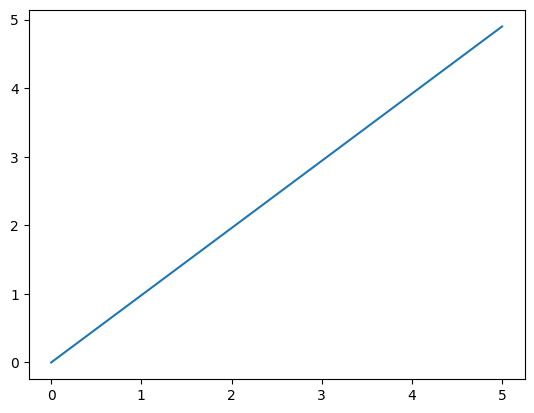

In [29]:
t = np.linspace(0, t_max, steps)
plt.plot(t, x)
plt.show()

In [30]:
fig, ax = plt.subplots()

# 1. 그림 범위 설정
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

# 2. 점 초기화
dt = 0.1        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
y_init = 0
vx_init = 1
vy_init = 1
pos_init = ax.scatter(x_init, y_init)

x = np.zeros(steps)
y = np.zeros(steps)
for t in range(steps):
  if t == 0:
    x[t] = x_init
    y[t] = y_init
  else:
    x[t] = x[t-1] + vx_init * dt
    y[t] = y[t-1] + vy_init * dt

# 3) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(x[t], y[t])로 이동
def animate(t):
    pos_init.set_offsets((x[t], y[t]))
    return (pos_init,)

# 4) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=steps,         # 총 프레임 수 = time 만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

## 2. 등가속도운동 (Constant Acceleration Motion)
여기서는 자유낙하운동을 다룬다.

- 정의: 가속도가 일정한 운동
- 방정식: 위치 $x(t) = x_0 + v_0 t + \tfrac{1}{2} a t^2$

In [40]:
fig, ax = plt.subplots()

# 1. 점 초기화
dt = 0.1        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
y_init = 0
vy_init = 0
ay_init = -9.8
pos_init = ax.scatter(x_init, y_init)

y = np.zeros(steps)
vy = np.zeros(steps)
for t in range(steps):
  if t == 0:
    y[t] = y_init
    vy[t] = vy_init
  else:
    y[t] = y[t-1] + vy[t-1] * dt
    vy[t] = vy[t-1] + ay_init * dt

# 2) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(0, y[t])로 이동
def animate(t):
    pos_init.set_offsets((0, y[t]))
    return (pos_init,)

# 3) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=steps,         # 총 프레임 수 = time 만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 4) 그림 범위 설정
ax.set_xlim([-1, 1])
ax.set_ylim([y[-1], 0])

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

In [ ]:
# 1. 점 초기화
dt = 0.01        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
y_init = 0
vy_init = 0
ay_init = -9.8
pos_init = ax.scatter(x_init, y_init)

y = np.zeros(steps)
vy = np.zeros(steps)
for t in range(steps):
  if t == 0:
    y[t] = y_init
    vy[t] = vy_init
  else:
    y[t] = y[t-1] + vy[t-1] * dt
    vy[t] = vy[t-1] + ay_init * dt

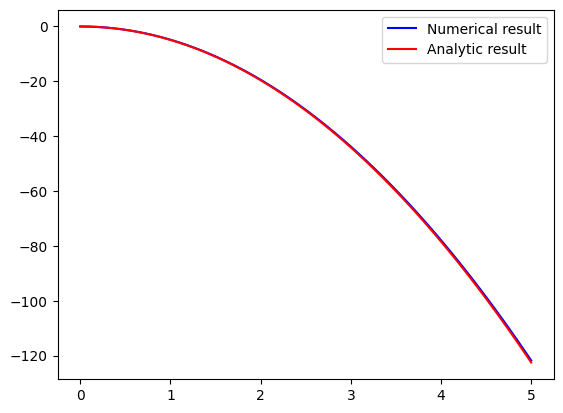

In [43]:
t = np.linspace(0, t_max, steps)
plt.plot(t, y, color='blue', label='Numerical result')
plt.plot(t, y_init+vy_init*t+0.5*ay_init*t**2, color='red', label='Analytic result')
plt.legend()
plt.show()

## 3. 포물선운동 (Projectile Motion)

- 정의: 중력만을 받으며 포물선을 그리는 운동
- 방정식:
  - $x(t) = v_0 \cos(\theta) \; t$
  - $y(t) = v_0 \sin(\theta) \; t - \tfrac{1}{2} g t^2$

In [79]:
fig, ax = plt.subplots()

# 1. 점 초기화
dt = 0.1        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
y_init = 0
vx_init = 1
vy_init = 1
ax_init = 0
ay_init = -9.8
pos_init = ax.scatter(x_init, y_init)

x = np.zeros(steps)
y = np.zeros(steps)
vx = np.zeros(steps)
vy = np.zeros(steps)
for t in range(steps):
  if t == 0:
    x[t] = x_init
    y[t] = y_init
    vx[t] = vx_init
    vy[t] = vy_init
  else:
    x[t] = x[t-1] + vx[t-1] * dt
    y[t] = y[t-1] + vy[t-1] * dt
    vx[t] = vx[t-1] + ax_init * dt
    vy[t] = vy[t-1] + ay_init * dt

# 2) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(x[t], y[t])로 이동
def animate(t):
    pos_init.set_offsets((x[t], y[t]))
    return (pos_init,)

# 3) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=steps,         # 총 프레임 수 = time 만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 4. 그림 범위 설정
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

In [80]:
fig, ax = plt.subplots()

# 1. 점 초기화
dt = 0.1        # 시간 간격 (s)
t_max = 5       # 최대 시간 (s)
steps = int(t_max / dt)

x_init = 0
y_init = 0
v_init = 1
v_theta = np.pi/3
vx_init = v_init * np.cos(v_theta)
vy_init = v_init * np.sin(v_theta)
ax_init = 0
ay_init = -9.8
pos_init = ax.scatter(x_init, y_init)

x = np.zeros(steps)
y = np.zeros(steps)
vx = np.zeros(steps)
vy = np.zeros(steps)
for t in range(steps):
  if t == 0:
    x[t] = x_init
    y[t] = y_init
    vx[t] = vx_init
    vy[t] = vy_init
  else:
    x[t] = x[t-1] + vx[t-1] * dt
    y[t] = y[t-1] + vy[t-1] * dt
    vx[t] = vx[t-1] + ax_init * dt
    vy[t] = vy[t-1] + ay_init * dt

# 2) 매 프레임마다 호출될 함수: 각 scatter를 새 위치(x[t], y[t])로 이동
def animate(t):
    pos_init.set_offsets((x[t], y[t]))
    return (pos_init,)

# 3) 애니메이션 객체 생성
ani = animation.FuncAnimation(
    fig,                  # 어느 Figure에 그릴지
    animate,              # 매 프레임마다 호출할 함수
    repeat=True,          # 끝나면 다시 처음부터 반복
    frames=steps,         # 총 프레임 수 = time 만큼
    interval=50           # 프레임 간 간격(밀리초)
)

# 4. 그림 범위 설정
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])

# 5) 정적 그림 제거, jshtml로 표시
plt.close(fig)
rc('animation', html='jshtml')
ani

### 각도에 따른 물체 운동

In [90]:
x_lst = []
y_lst = []
v_theta_lst = [np.pi/6, np.pi/4, np.pi/3]

for v_theta in v_theta_lst:
  dt = 0.001        # 시간 간격 (s)
  t_max = 5       # 최대 시간 (s)
  steps = int(t_max / dt)

  x_init = 0
  y_init = 0
  v_init = 5
  vx_init = v_init * np.cos(v_theta)
  vy_init = v_init * np.sin(v_theta)
  ax_init = 0
  ay_init = -9.8

  x = np.zeros(steps)
  y = np.zeros(steps)
  vx = np.zeros(steps)
  vy = np.zeros(steps)
  for t in range(steps):
    if t == 0:
      x[t] = x_init
      y[t] = y_init
      vx[t] = vx_init
      vy[t] = vy_init
    else:
      x[t] = x[t-1] + vx[t-1] * dt
      y[t] = y[t-1] + vy[t-1] * dt
      vx[t] = vx[t-1] + ax_init * dt
      vy[t] = vy[t-1] + ay_init * dt
    # 땅에 닿으면 계산 중단
    if y[t] < 0:
        break

  x_lst.append(x)
  y_lst.append(y)

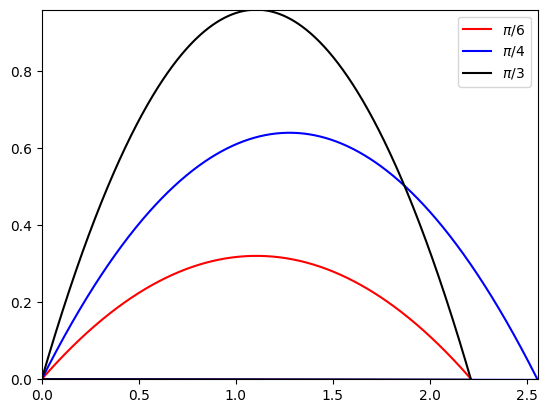

In [91]:
angles = ['$\pi/6$', '$\pi/4$', '$\pi/3$']
colors = ['red','blue','black']
for i in range(3):
  plt.plot(x_lst[i], y_lst[i], color=colors[i], label=angles[i])
plt.xlim([0, max([max(i) for i in x_lst])])
plt.ylim([0, max([max(i) for i in y_lst])])
plt.legend()
plt.show()